# Atricle , newspaer3k import
기사 크롤링 해오기, word2vec module

In [4]:
!pip install newspaper3k
!pip install konlpy
!pip install gensim
import seaborn as sns
import networkx as nx


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
from newspaper import Article
#기사 링크(독거노인, 우울증) 관련 기사 가져오기
URL = [ "https://www.1conomynews.co.kr/news/articleView.html?idxno=25772", "https://www.yna.co.kr/view/AKR20240112045600063" ,"https://mdtoday.co.kr/news/view/1065578601572123" , "https://www.cctoday.co.kr/news/articleView.html?idxno=2181067"]
#, "https://www.cctoday.co.kr/news/articleView.html?idxno=2181067"
# 우울증, 고독사
for i in range(len(URL)):
    article = Article(URL[i], language='ko')
    article.download()
    article.parse()

    news_title = article.title
    news_context = article.text

    # Generate a file name with a unique number
    file_number = i + 1  # Start numbering from 1
    file_name = f"/home/sm32289/GDSC_Newyear/Emotion/txtfile/News_articles/news_article{file_number}.txt"

    with open(file_name, "w", encoding="utf-8") as file:
        file.write("Title: " + news_title + "\n\n")
        file.write(news_context)

    print("News article has been saved to", file_name)

News article has been saved to /home/sm32289/GDSC_Newyear/Emotion/txtfile/News_articles/news_article1.txt


In [5]:
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from gensim.models import word2vec
import os

# 기사 파일들이 저장된 디렉토리 경로
directory_path = '/home/sm32289/GDSC_Newyear/Emotion/txtfile/News_articles'


# 디렉토리 내의 모든 .txt 파일을 읽어서 합침
train_article = len(os.listdir(directory_path))
result = []
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        filepath = os.path.join(directory_path, filename)
        with open(filepath, 'rt', encoding='utf-8') as myfile:
            soup = BeautifulSoup(myfile, 'html.parser')
            mydata = soup.text

        okt = Okt()
        detalines = mydata.split('\n')

        for oneline in detalines:
            mypos = okt.pos(oneline, norm=True, stem=True)
            tmp = []
            for word in mypos:
                # 조사, 어미, 구두점, 동사가 아니고, 두 글자 이상인 것들만 tmp에 담음
                if not word[1] in ['Josa', 'Eomi', 'Punctuation', 'Verb']:
                    if len(word[0]) >= 2:
                        tmp.append(word[0])

            tmp = (' '.join(tmp)).strip()  # 공백으로 결합
            result.append(tmp)

# 전처리한 결과를 텍스트 파일로 저장
combine_dir = "/home/sm32289/GDSC_Newyear/Emotion/txtfile/combine_data"
result_file = f'word2vecTest.prepro{len(os.listdir(combine_dir)) + 1}'  # 텍스트 파일임!
result_file = os.path.join(combine_dir, result_file)
with open(result_file, 'wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(result))  # 라인으로 결합

print(result_file + ' 파일 저장됨!')

# ----------------------------------

# 모델 만들기
data = word2vec.LineSentence(source=result_file)
model = word2vec.Word2Vec(data, vector_size=200, window=10, hs=1, min_count=2, sg=1)







# .model 파일은 이진 파일임
directory_path = '/home/sm32289/GDSC_Newyear/Emotion/txtfile/word2vecmodel'

# 디렉토리 내의 파일 목록을 가져옴
file_list = os.listdir(directory_path)

# 파일의 개수 출력
file_count = len(file_list)

model_filename = f'word2vec.model{file_count+1}'
model_save_dir = os.path.join(directory_path, model_filename)
model.save(model_save_dir)
print(model_save_dir + ' 모델 저장됨!')

print('-finished-')

# 학습 모델의 학습 정보(데이터의 개수 정보 담기)
train_setting_directory_path = '/home/sm32289/GDSC_Newyear/Emotion/txtfile/train_setting'
file_number = len(os.listdir(train_setting_directory_path)) + 1
file_name = f"/home/sm32289/GDSC_Newyear/Emotion/txtfile/train_setting/news_article{file_number}.txt"

with open(file_name, "w", encoding="utf-8") as file:
    file.write("----------------------------Train setting--------------------------------\n\n")
    file.write(f"Train article Num : {train_article}")
    file.write("save model dir : " +  str(model_save_dir))


/home/sm32289/GDSC_Newyear/Emotion/txtfile/combine_data/word2vecTest.prepro1 파일 저장됨!
/home/sm32289/GDSC_Newyear/Emotion/txtfile/word2vecmodel/word2vec.model1 모델 저장됨!
-finished-


['고독사', '노인', '예방', '사회', '고립', '있다', '지원', '가구', '복지부', '경찰', '센터', '주민', '통계', '발견', '계획', '수준', '차이', '지역', '발굴', '기준', '서울', '지난', '정부', '파악', '지자체', '배달', '직원', '신고', '열흘', '정책', '수치', '성북구', '은평구', '중요하다', '70', '복지', '의원', '자료', '오전', '사진', '발생', '야구르트', '최근', '대상자', '시신', '올해', '수급', '여전하다', '생활', '기초', '남성', '구청', '대한', '부패', '보건', '무연', '사망자', '기록', '2020년', '서울시', '수립', '정기', '접촉', '강조', '비율', '라며', '나쁘다', '제도', '개선', '전담', '위원회', '국회', '사망', '정보', '그동안', '서비스', '평소', '지병', '인력', '정도', '문제', '심각하다', '발표', '보건복지부', '기본', '체계', '한다는', '방침', '위기', '방문']
['70', '예방', '대한', '2020년', '무연']


ValueError: shapes (5,200) and (5,200) not aligned: 200 (dim 1) != 5 (dim 0)

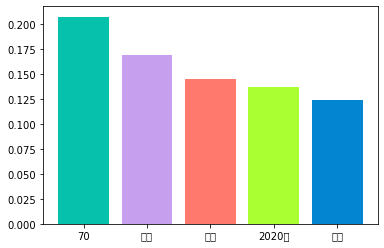

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import word2vec
from matplotlib import font_manager, rc
import matplotlib as mpl
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

plt.rc('font', family='Malgun Gothic')
def save_result_to_file(result, file_path):
    with open(file_path, "w", encoding="utf-8") as file:
        file.write("---------------------------- Result --------------------------------\n\n")
        for item in result:
            file.write(f"{item[0]} : {item[1]}\n")

# Function to show a heatmap
def show_heatmap(similarity_matrix, text_labels, result_dir):
    sns.heatmap(similarity_matrix, annot=True, xticklabels=text_labels, yticklabels=text_labels, cmap='YlGnBu')
    plt.xlabel('Texts')
    plt.ylabel('Texts')
    plt.title('Text Similarity Heatmap')

    # Save the result to a file
    file_number = len(os.listdir(result_dir)) + 1
    result_file_name = f"result_heatmap{file_number}.txt"
    result_file_path = os.path.join(result_dir, result_file_name)
    save_result_to_file(similarity_matrix, result_file_path)

    plt.show()

# Function to show a network graph
def show_network_graph(similarity_edges, node_labels, result_dir):
    G = nx.Graph()
    G.add_nodes_from(node_labels)
    G.add_weighted_edges_from(similarity_edges)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='skyblue', font_size=8)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title('Text Similarity Network Graph')

    # Save the result to a file
    file_number = len(os.listdir(result_dir)) + 1
    result_file_name = f"result_network_graph{file_number}.txt"
    result_file_path = os.path.join(result_dir, result_file_name)
    save_result_to_file(similarity_edges, result_file_path)

    plt.show()



def showGraph(bargraph, ytick, result_dir):
    font_path = "/home/sm32289/GDSC_Newyear/Emotion/txtfile/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)
    plt.rcParams['font.family'] = 'NanumGothic'
    xtick = [item[0] for item in bargraph]  # 단어
    print(xtick)
    result_file_name = f"result{file_number}.txt"
    result_file_path = os.path.join(result_dir, result_file_name)
    save_result_to_file(bargraph, result_file_path)

    plt.figure()

    mycolors = ['#06c2ac', '#c79fef', '#ff796c', '#aaff32', '#0485d1', '#d648d7', '#a5a502', '#d8dcd6', '#5ca904', '#fffe7a']

    plt.bar(xtick, ytick, color=mycolors)

    # Show heatmap
    heatmap_labels = xtick
    heatmap_values = np.array([model.wv[word] for word in heatmap_labels])  # Convert to numpy array
    similarity_matrix = model.wv.cosine_similarities(heatmap_values, heatmap_values)
    show_heatmap(similarity_matrix, heatmap_labels, result_dir)  # Remove reshape

    # Show network graph
    network_graph_edges = [(xtick[0], word, similarity) for word, similarity in zip(xtick[1:], ytick[1:])]
    show_network_graph(network_graph_edges, [xtick[0]] + xtick[1:], result_dir)


# 국민이라는 단어와 유사도가 높은 단어 10개를 리스트로 반환
print(model.wv.index_to_key)
bargraph = model.wv.most_similar(positive=['노인'], topn=5)
ytick = [item[1] for item in bargraph]  # 유사도
result_dir = "/home/sm32289/GDSC_Newyear/Emotion/txtfile/result_graph"
result_dirs = "/home/sm32289/GDSC_Newyear/Emotion/txtfile/result"

# save_result_to_file(bargraph, result_dirs)
showGraph(bargraph, ytick, result_dir)

plt.show()

In [22]:
import matplotlib    
import matplotlib.font_manager

[f.name for f in matplotlib.font_manager.fontManager.ttflist if 'Nanum' in f.name]

[]

In [21]:
!ls -l /usr/share/fonts/truetype/
!rm -rf ~/.cache/matplotlib/*
!fc-cache -fv

합계 184
drwxr-xr-x 2 root root 4096  9월 16  2021 Gargi
drwxr-xr-x 2 root root 4096  9월 16  2021 Gubbi
drwxr-xr-x 2 root root 4096  9월 16  2021 Nakula
drwxr-xr-x 2 root root 4096  9월 16  2021 Navilu
drwxr-xr-x 2 root root 4096  9월 16  2021 Sahadeva
drwxr-xr-x 2 root root 4096  9월 16  2021 Sarai
drwxr-xr-x 2 root root 4096  9월 16  2021 abyssinica
drwxr-xr-x 2 root root 4096  2월 15  2022 dejavu
drwxr-xr-x 2 root root 4096  9월 16  2021 droid
drwxr-xr-x 2 root root 4096  5월 30  2023 font-awesome
drwxr-xr-x 2 root root 4096  9월 16  2021 fonts-beng-extra
drwxr-xr-x 2 root root 4096  9월 16  2021 fonts-deva-extra
drwxr-xr-x 2 root root 4096  9월 16  2021 fonts-gujr-extra
drwxr-xr-x 2 root root 4096  9월 16  2021 fonts-guru-extra
drwxr-xr-x 2 root root 4096  9월 16  2021 fonts-kalapi
drwxr-xr-x 2 root root 4096  9월 16  2021 fonts-orya-extra
drwxr-xr-x 2 root root 4096  9월 16  2021 fonts-telu-extra
drwxr-xr-x 2 root root 4096  9월 16  2021 freefont
drwxr-xr-x 2 root root 4096  9월 16  2021 kacst
drwxr-

['사과', '바나나', '딸기']


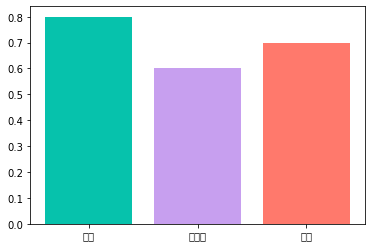

In [36]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

def showGraph(bargraph):
    # 한글 폰트 설정
    font_path = "/home/sm32289/GDSC_Newyear/Emotion/txtfile/NanumGothic.ttf"
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

    xtick = [item[0] for item in bargraph] # 단어
    print(xtick)
    ytick = [item[1] for item in bargraph] # 유사도

    plt.figure()

    mycolors = ['#06c2ac', '#c79fef', '#ff796c', '#aaff32', '#0485d1', '#d648d7', '#a5a502', '#d8dcd6', '#5ca904', '#fffe7a' ]

    plt.bar(xtick, ytick, color=mycolors)
    plt.show()

# 사용 예시
bargraph_data = [("사과", 0.8), ("바나나", 0.6), ("딸기", 0.7)]
showGraph(bargraph_data)

In [34]:
import matplotlib.font_manager
print([f.name for f in matplotlib.font_manager.fontManager.ttflist])


['STIXSizeTwoSym', 'DejaVu Sans', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'DejaVu Serif', 'cmss10', 'STIXNonUnicode', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'cmtt10', 'DejaVu Serif', 'DejaVu Sans', 'DejaVu Serif', 'cmr10', 'STIXGeneral', 'STIXGeneral', 'STIXSizeOneSym', 'STIXNonUnicode', 'STIXSizeTwoSym', 'cmmi10', 'DejaVu Sans Mono', 'cmb10', 'STIXSizeFourSym', 'STIXSizeOneSym', 'STIXSizeFiveSym', 'DejaVu Sans', 'DejaVu Serif Display', 'STIXGeneral', 'DejaVu Serif', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'STIXGeneral', 'cmsy10', 'STIXSizeFourSym', 'cmex10', 'Dyuthi', 'MathJax_Main', 'KacstPoster', 'Liberation Serif', 'Nakula', 'KacstOne', 'Tlwg Mono', 'Rachana', 'Ubuntu', 'Liberation Sans Narrow', 'Kinnari', 'Waree', 'Liberation Mono', 'Ubuntu Mono', 'Norasi', 'Liberation Mono', 'Noto Sans CJK JP', 'Tlwg Typist', 'FreeMono', 'Umpush', 'Samyak Devanagari', 'KacstDecorative', 'Lohit Devanagari', 'Tlwg Mono', 'Rachana', 'Liberation 

0.0680987


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 0: invalid start byte

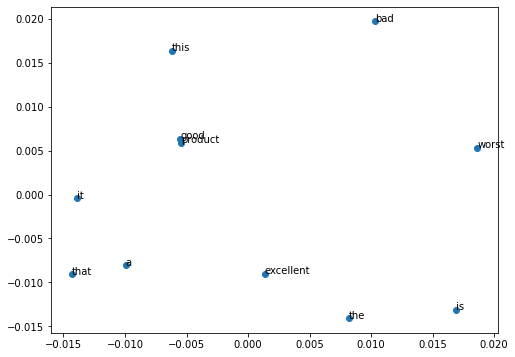

In [1]:
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 단어와 2차원 X축의 값, Y축의 값을 입력받아 2차원 그래프를 그린다
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8, 6))
    plt.scatter(xs, ys, marker='o')
    for i, v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i], ys[i]))

sentences = [
    ['this', 'is', 'a', 'good', 'product'],
    ['it', 'is', 'a', 'excellent', 'product'],
    ['it', 'is', 'a', 'bad', 'product'],
    ['that', 'is', 'the', 'worst', 'product']
]

# 문장을 이용하여 단어와 벡터를 생성한다.
model = Word2Vec(sentences, vector_size=300, window=3, min_count=1, workers=1)

# 단어벡터를 구한다.
word_vectors = model.wv

vocabs = word_vectors.index_to_key
word_vectors_list = [word_vectors[v] for v in vocabs]

# 결과1 : 단어 간 유사도를 확인
print(word_vectors.similarity(w1='it', w2='this'))

# PCA를 이용하여 단어 벡터를 2차원으로 축소
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

# 결과2
plot_2d_graph(vocabs, xs, ys)

file_name = '/home/sm32289/GDSC_Newyear/Emotion/txtfile/ko.bin'
model.wv.intersect_word2vec_format(fname=file_name, binary=True)

# 단어벡터를 다시 구한다.
word_vectors = model.wv

vocabs = word_vectors.index_to_key
word_vectors_list = [word_vectors[v] for v in vocabs]

# 결과3 : 단어 간 유사도를 확인
print(word_vectors.similarity(w1='it', w2='this'))

# PCA를 이용하여 단어 벡터를 2차원으로 축소
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:, 0]
ys = xys[:, 1]

# 결과4
plot_2d_graph(vocabs, xs, ys)

# 최종 모델을 저장한다.
model.save('word2vec.model')

# 저장한 모델을 읽어서 이용한다.
loaded_model = Word2Vec.load('word2vec.model')
